In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = np.loadtxt("./Data/houses.txt", delimiter=',')
X_train = data[:,0:4]
Y_train = data[:,4]
X_features = ['size(sqft)','bedrooms','floors','age']

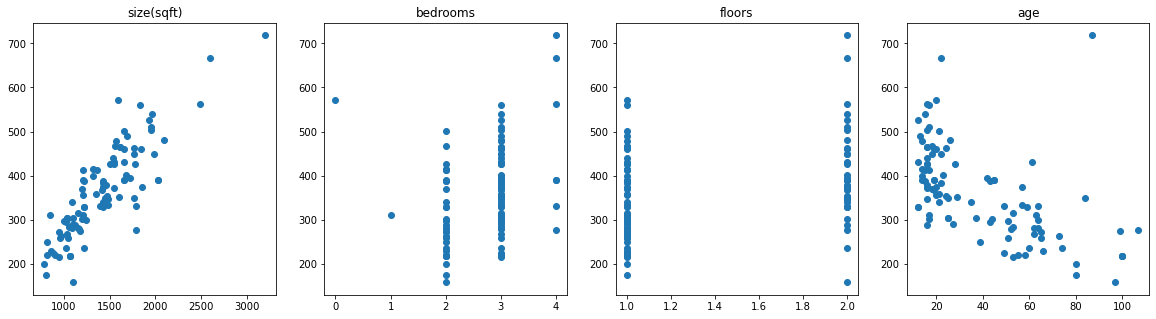

In [41]:
fig, axArray = plt.subplots(1,4, figsize=(20,5))
for i in range(len(axArray)):
    axArray[i].plot(X_train[:,i], Y_train, 'o')
    axArray[i].set_title(X_features[i])
plt.show()

In [73]:
def predict(X, w, b):
    return np.dot(X,w)+b

def computeCost(X, w, b, y):
    n = X.shape[0]
    cost = 0
    for i in range(n):
        cost += (y[i] - predict(X[i], w, b))**2

    return cost/(2*n)

def compueteGradient(X,y,w,b):
    n = X.shape[0]
    m = X.shape[1]
    gradient_W = np.zeros(m)
    gradient_b = 0
    for i in range(n):
        for j in range(m):
            gradient_W[j] += (predict(X[i,:],w,b)-y[i])*X[i,j]
        gradient_b += (predict(X[i,:],w,b)-y[i])
    return gradient_W/n, gradient_b/n

def gradientDescent(X, y, w0, b0, alpha, numIters):
    w = w0
    b = b0
    costArray = np.zeros(numIters)

    for i in range(numIters):
        w = w - alpha * compueteGradient(X,y,w,b)[0]
        b = b - alpha * compueteGradient(X,y,w,b)[1]
        costArray[i] = computeCost(X,w,b,y)

    return w, b, costArray


def zScoreNormalization(X):
    return (X- np.mean(X))/np.std(X)

X_norm = zScoreNormalization(X_train)
Y_norm = zScoreNormalization(Y_train)

w, b, costArray = gradientDescent(X_norm, Y_norm, np.zeros(4), 0, 0.01, 1000)


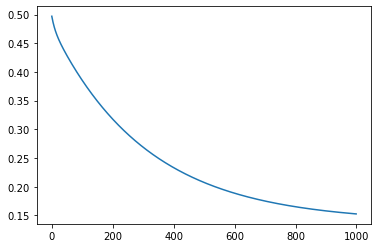

In [74]:
plt.plot(costArray)
plt.show()